In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import time
import pickle
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
## Carga de data frame
data_frame = pd.read_csv('weatherAUS.csv')

In [5]:
data_frame.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
data_frame.shape

(142193, 24)

In [7]:
## Preparando la data ##

In [8]:
## Resumen del conjunto de Datos

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [9]:
## Preprocesamiento de Datos 

#Conversión Dtype de object a float 

data_frame['Pressure3pm'] = pd.to_numeric(data_frame['Pressure3pm'],errors = 'coerce')

In [10]:
## Tipos de Caracteristicas

# Caracteristicas Categoricas

caracteristicas_categoricas = [nom_columna for nom_columna in data_frame.columns if data_frame[nom_columna].dtype == 'O']
print("Numero de Caracteristicas Categoricas: {}".format(len(caracteristicas_categoricas)))
print("Caracteristicas Categoricas: ",caracteristicas_categoricas)

Numero de Caracteristicas Categoricas: 7
Caracteristicas Categoricas:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
# Caracteristicas Numéricas

caracteristicas_numericas = [nom_columna for nom_columna in data_frame.columns if data_frame[nom_columna].dtype != 'O']
print("Numero de Caracteristicas Numericas: {}".format(len(caracteristicas_numericas)))
print("Caracteristicas Numericas: ",caracteristicas_numericas)

Numero de Caracteristicas Numericas: 17
Caracteristicas Numericas:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [12]:
# Comprobación de Cardinalidad en Caracteristicas Categóricas

for cada_caracteristica in caracteristicas_categoricas:
   unique_values = len(data_frame[cada_caracteristica].unique())
   print("Cardinalidad (Nro de Valores Unicos) de {} son: {}".format(cada_caracteristica, unique_values))

## SE OBSERVA QUE LA COLUMNA 'Date' TIENE UNA ALTA CARDINALIDAD O ALTO NUMERO DE VALORES UNICOS

Cardinalidad (Nro de Valores Unicos) de Date son: 3436
Cardinalidad (Nro de Valores Unicos) de Location son: 49
Cardinalidad (Nro de Valores Unicos) de WindGustDir son: 17
Cardinalidad (Nro de Valores Unicos) de WindDir9am son: 17
Cardinalidad (Nro de Valores Unicos) de WindDir3pm son: 17
Cardinalidad (Nro de Valores Unicos) de RainToday son: 3
Cardinalidad (Nro de Valores Unicos) de RainTomorrow son: 2


In [13]:
#Conversión Dtype de object a datetime

data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [14]:
data_frame['Date'].dtype

dtype('<M8[ns]')

In [15]:
## Aplicación de Ingeniería de Características a la columna 'Date' para disminuir la alta cardinalidad

data_frame['year'] = data_frame['Date'].dt.year
data_frame['month'] = data_frame['Date'].dt.month
data_frame['day'] = data_frame['Date'].dt.day

In [16]:
## Resultado de IC en la columna 'Date'

data_frame.drop('Date', axis = 1, inplace = True)
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [17]:
# Caracteristicas Categoricas

caracteristicas_categoricas = [nom_columna for nom_columna in data_frame.columns if data_frame[nom_columna].dtype == 'O']
print("Numero de Caracteristicas Categoricas: {}".format(len(caracteristicas_categoricas)))
print("Caracteristicas Categoricas: ",caracteristicas_categoricas)

Numero de Caracteristicas Categoricas: 6
Caracteristicas Categoricas:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# Caracteristicas Numéricas

caracteristicas_numericas = [nom_columna for nom_columna in data_frame.columns if data_frame[nom_columna].dtype != 'O']
print("Numero de Caracteristicas Numericas: {}".format(len(caracteristicas_numericas)))
print("Caracteristicas Numericas: ",caracteristicas_numericas)

Numero de Caracteristicas Numericas: 20
Caracteristicas Numericas:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'year', 'month', 'day']


In [19]:
## Manejo de valores Nulos en Caracteristicas Categoricas

data_frame[caracteristicas_categoricas].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [20]:
## Lista de Caracteristicas Categoricas que tienen valores NULOS.

caracteristicas_categoricas_con_nulos = [caracteristica for caracteristica in caracteristicas_categoricas if data_frame[caracteristica].isnull().sum()]
caracteristicas_categoricas_con_nulos

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [21]:
## Relleno de valores nulos con el valor mas frecuente(moda)

for cada_caracteristica in caracteristicas_categoricas_con_nulos:
    mode_val = data_frame[cada_caracteristica].mode()[0]
    data_frame[cada_caracteristica].fillna(mode_val,inplace=True)

In [22]:
## Tratatamiento de nulos realizado
data_frame[caracteristicas_categoricas].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [23]:
## Manejo de valores nulos en Caracteristicas Numéricas

data_frame[caracteristicas_numericas].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
year                 0
month                0
day                  0
dtype: int64

<AxesSubplot:>

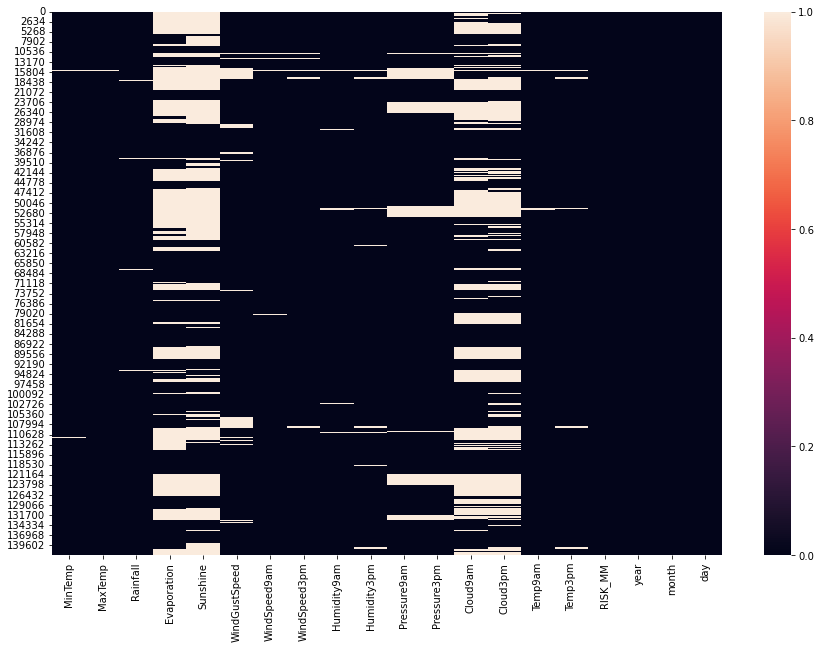

In [24]:
## Visualización de valores nulos
plt.figure(figsize=(15,10))
sns.heatmap(data_frame[caracteristicas_numericas].isnull(),linecolor='white')

<AxesSubplot:>

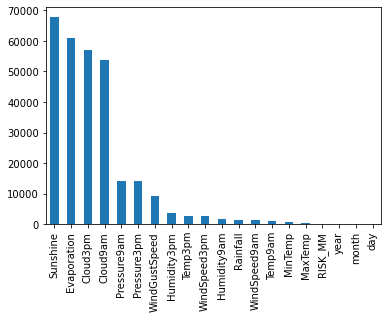

In [25]:
## Visualización de valores nulos

data_frame[caracteristicas_numericas].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

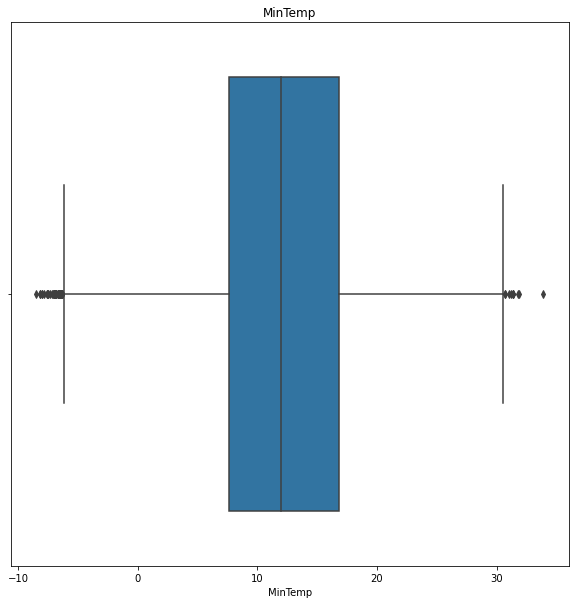

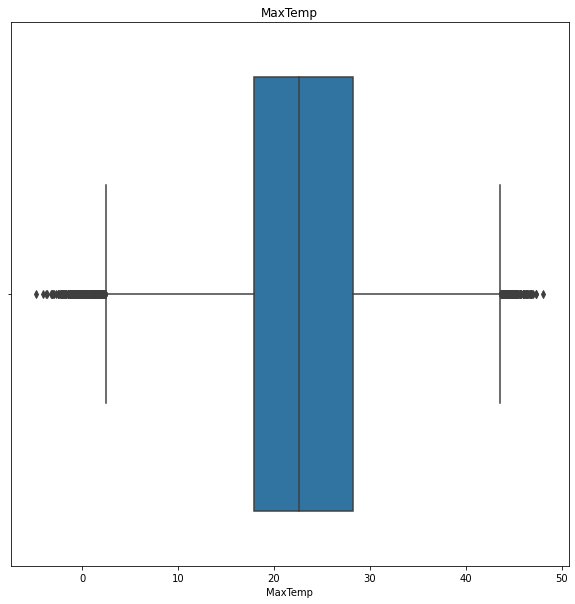

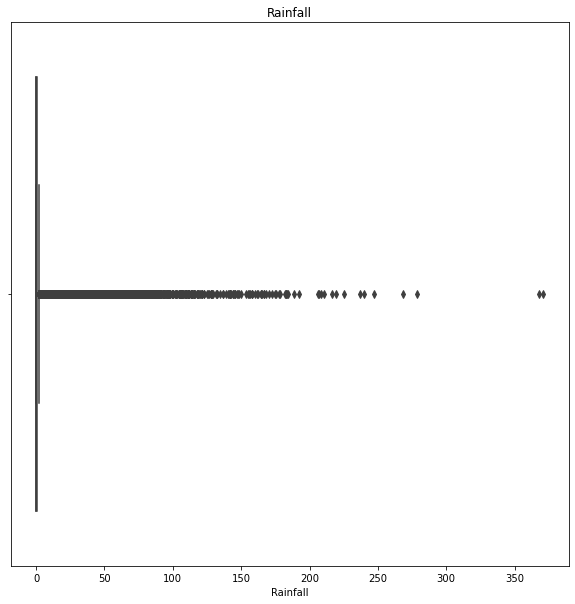

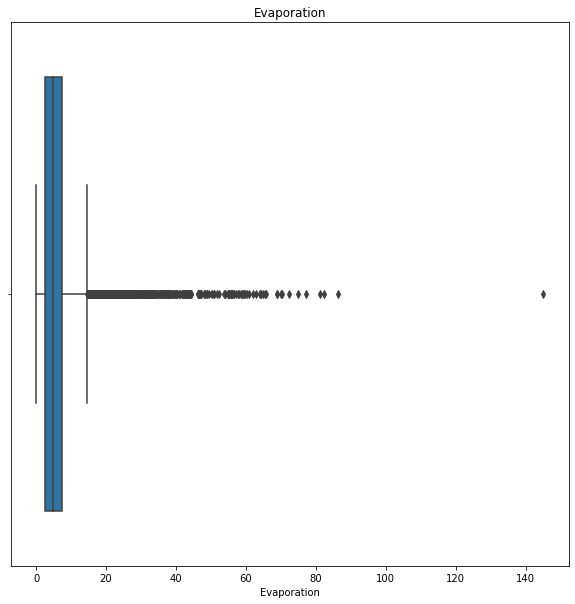

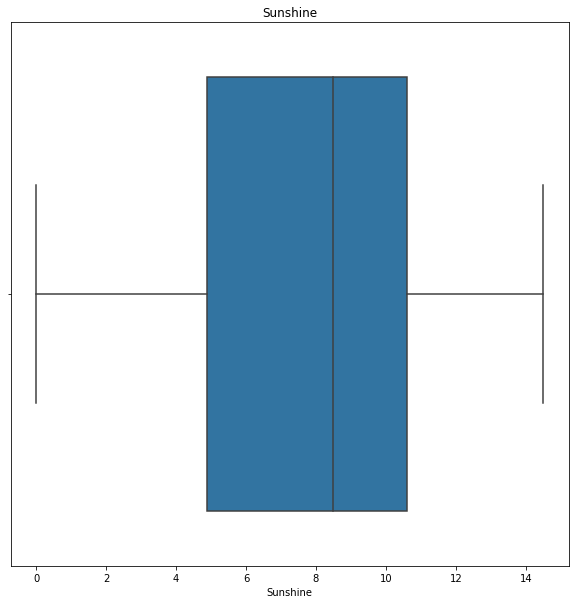

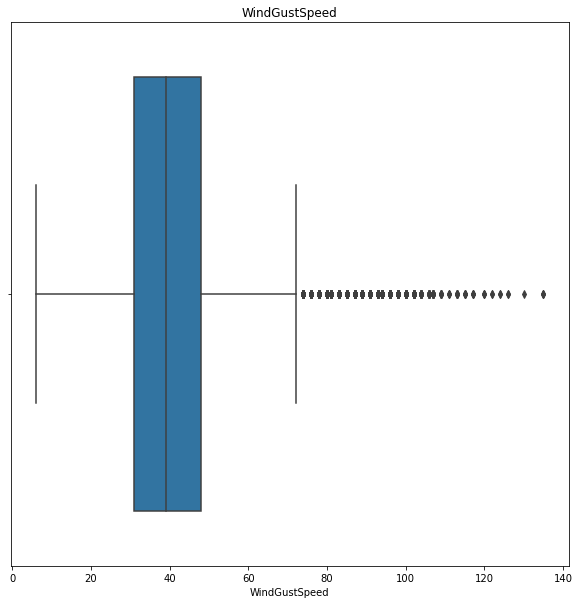

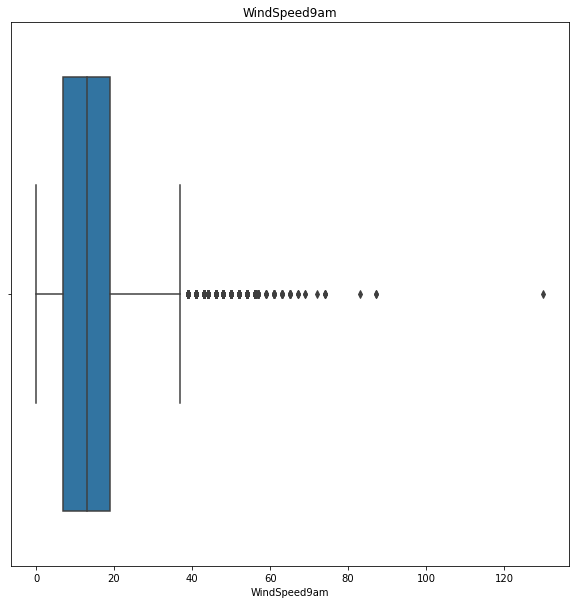

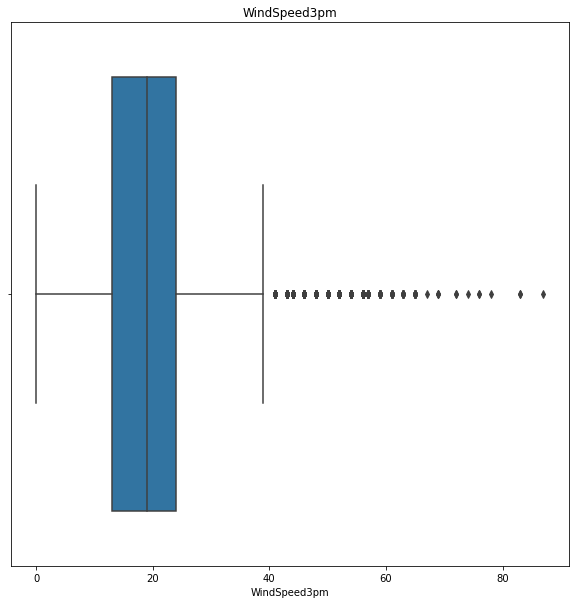

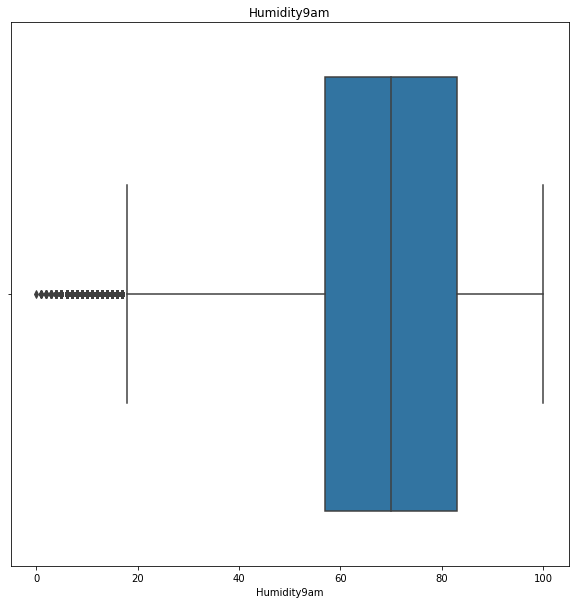

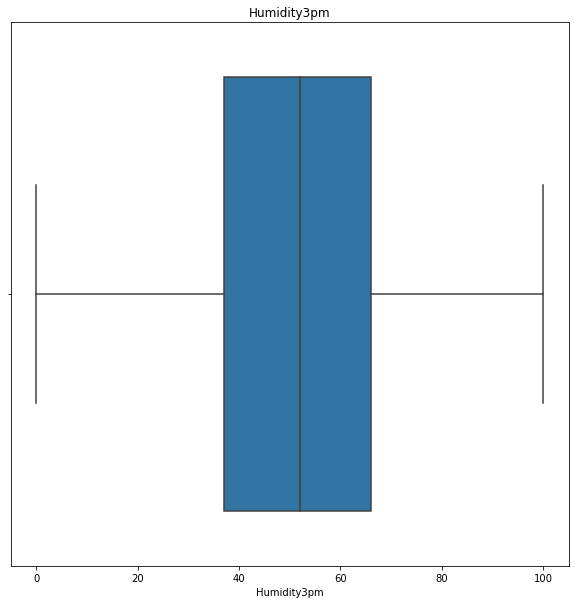

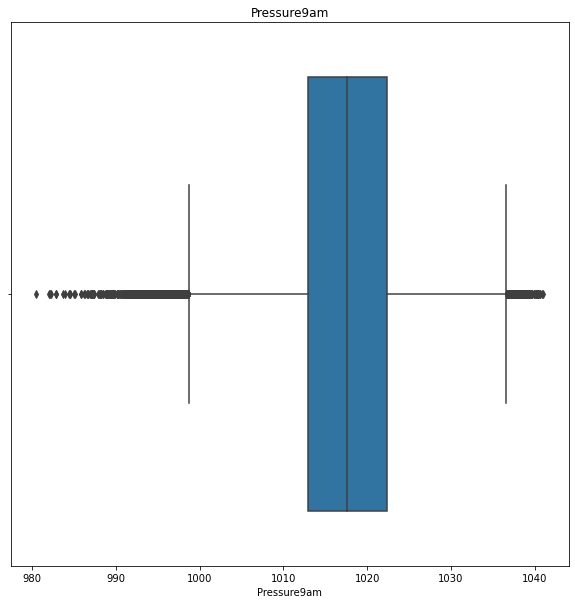

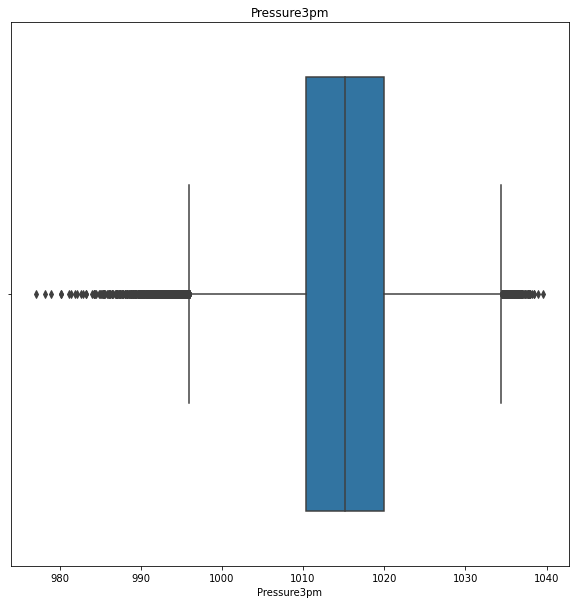

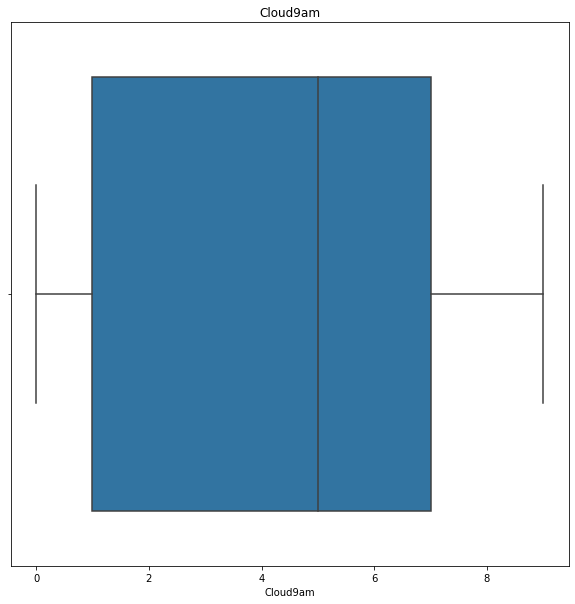

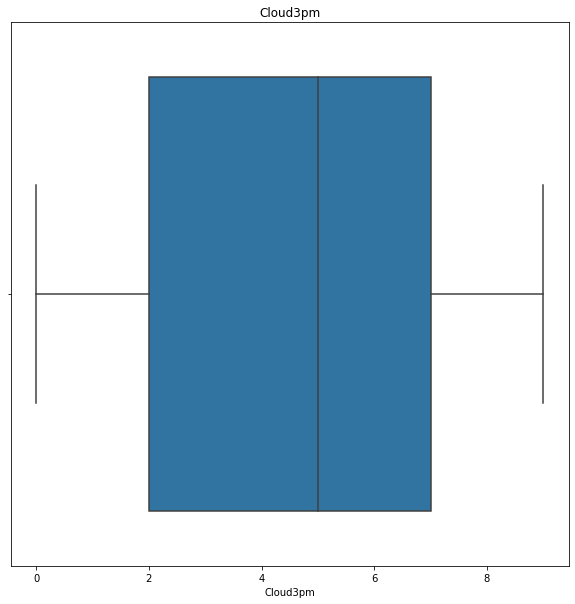

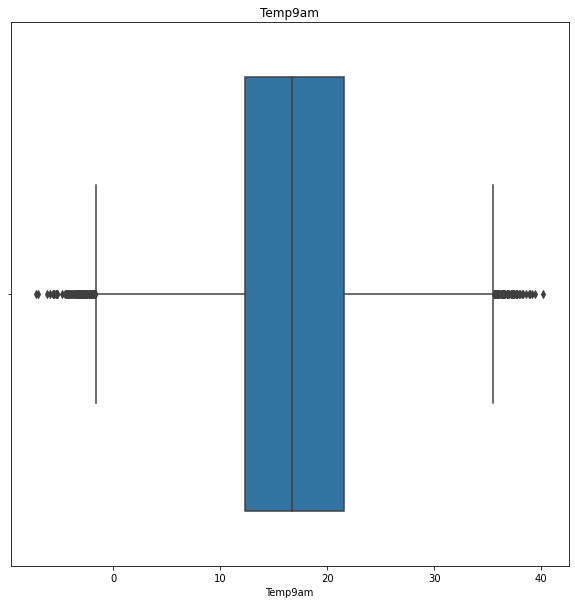

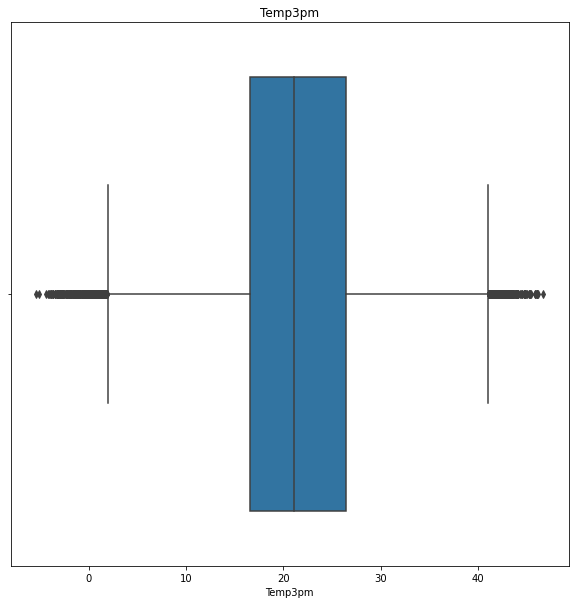

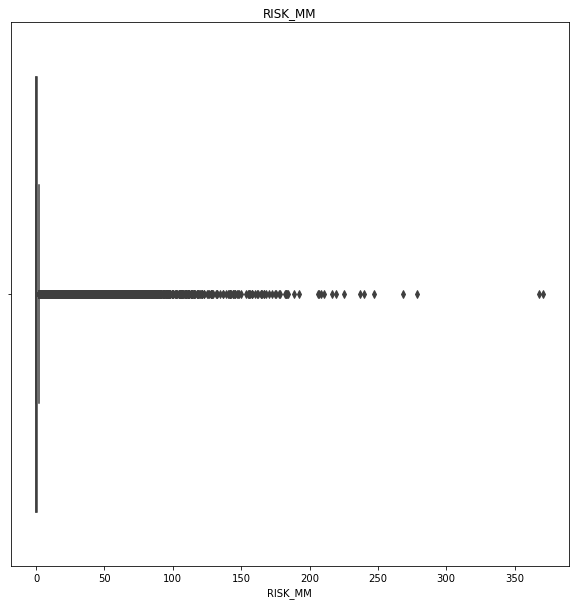

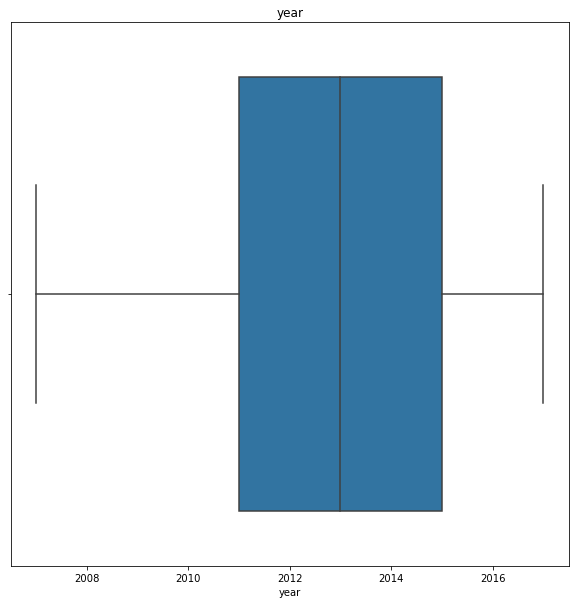

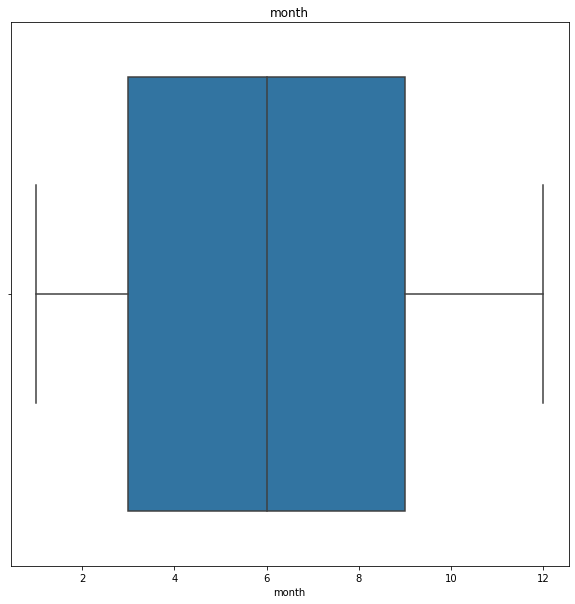

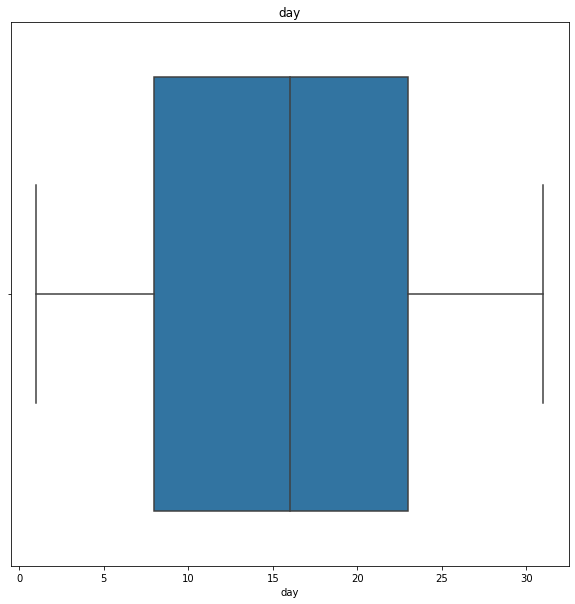

In [26]:
for caracteristica in caracteristicas_numericas:
 plt.figure(figsize=(10,10))
 sns.boxplot(data_frame[caracteristica])
 plt.title(caracteristica)


In [27]:
data_frame[caracteristicas_numericas].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,year,month,day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


In [28]:
## Caracteristicas con Valores Atipicos (OUTLIERS)

caracteristicas_valores_atipicos = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM' ]

In [29]:
## Reemplazando Valores Atipicos usando IQR

for caracteristica in caracteristicas_valores_atipicos:
    q1 = data_frame[caracteristica].quantile(0.25)
    q3 = data_frame[caracteristica].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data_frame.loc[data_frame[caracteristica]<lower_limit,caracteristica] = lower_limit
    data_frame.loc[data_frame[caracteristica]>upper_limit,caracteristica] = upper_limit

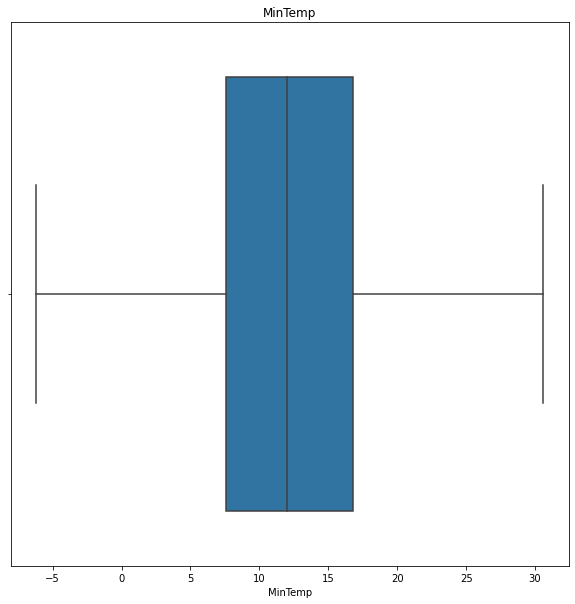

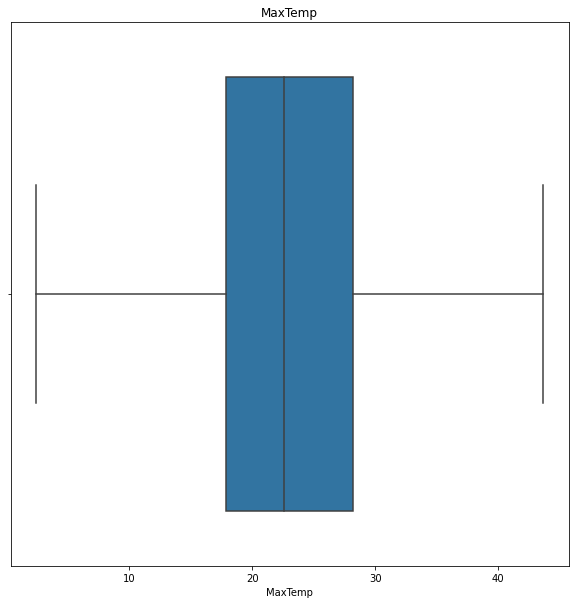

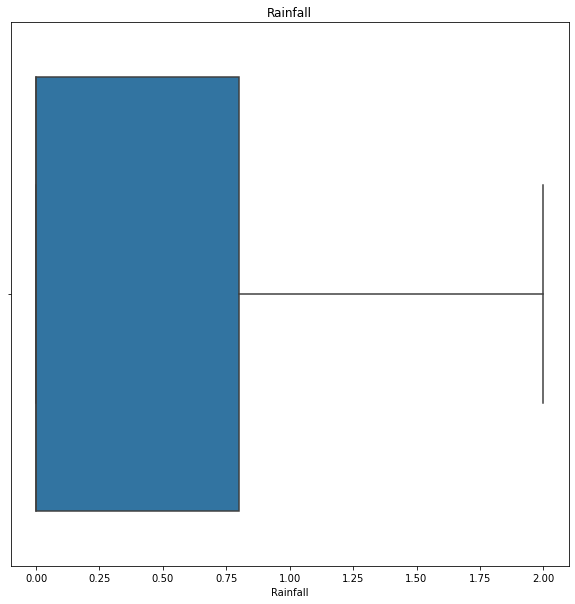

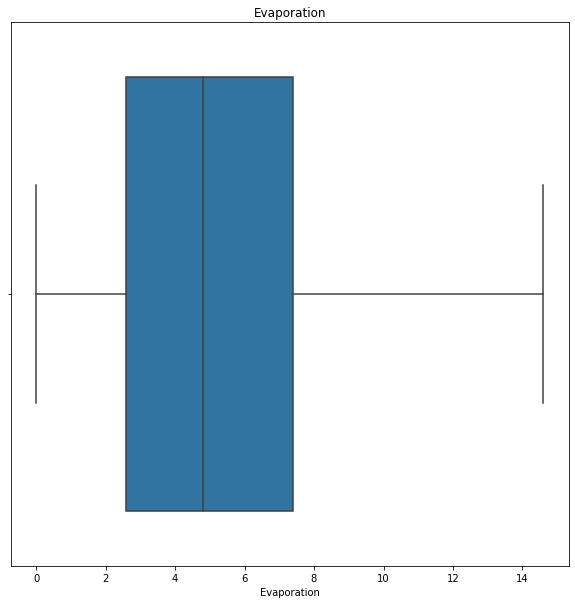

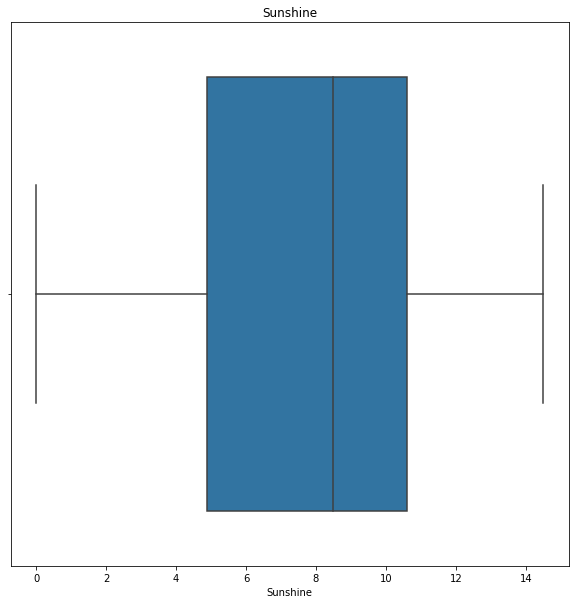

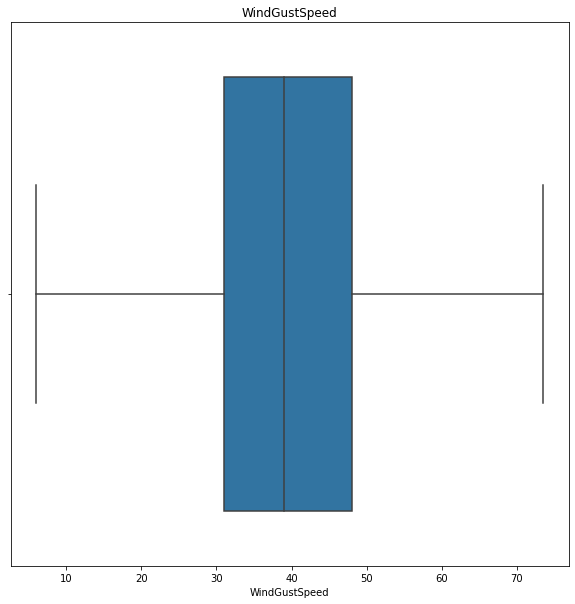

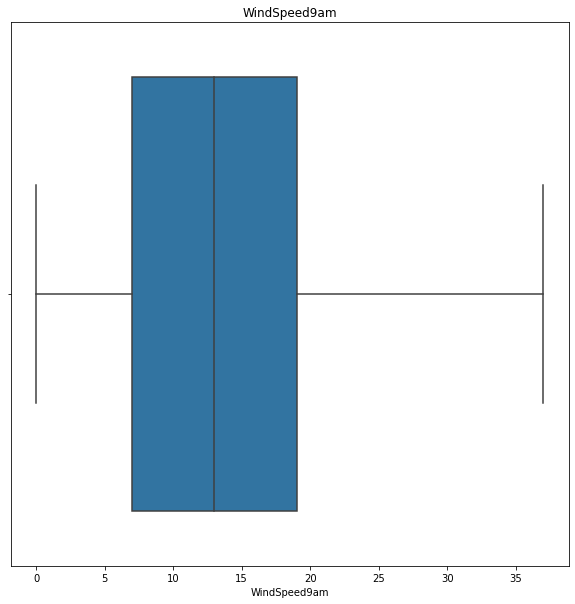

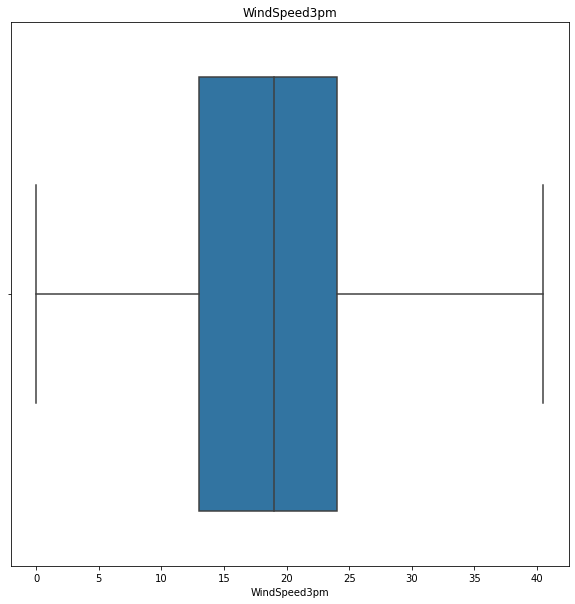

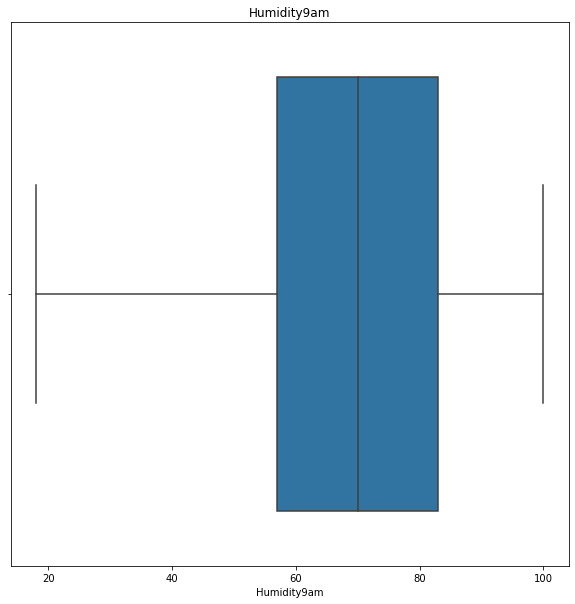

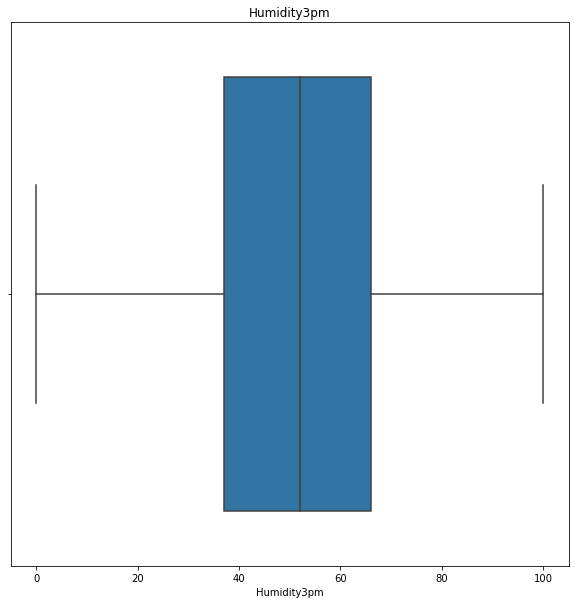

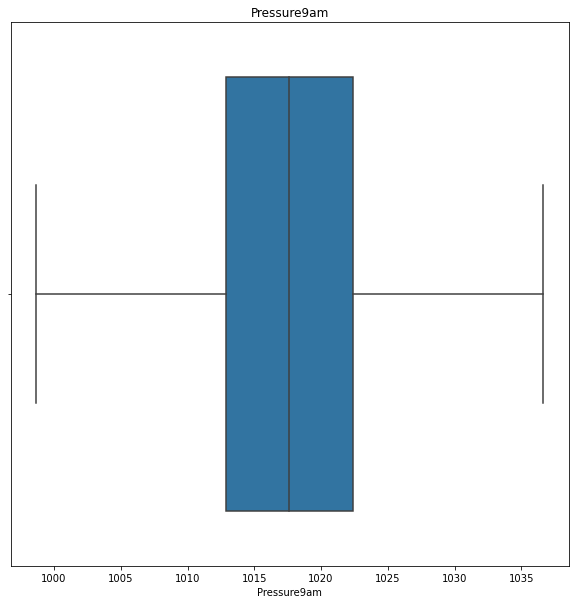

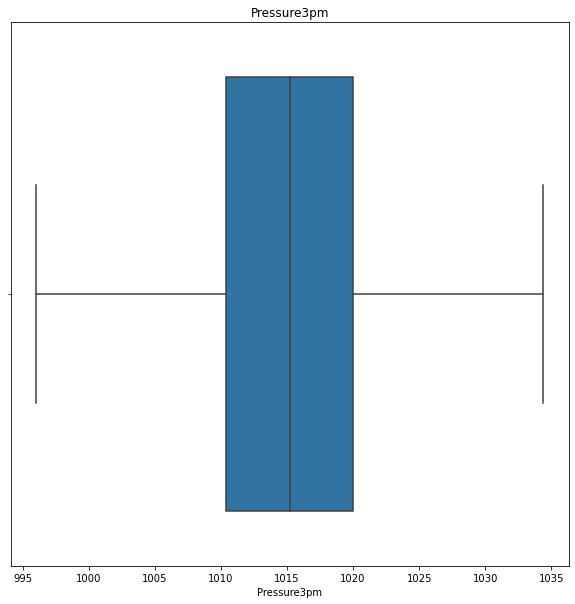

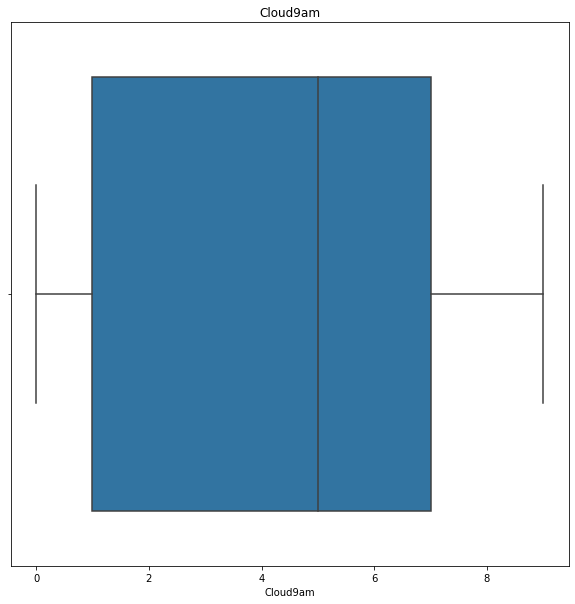

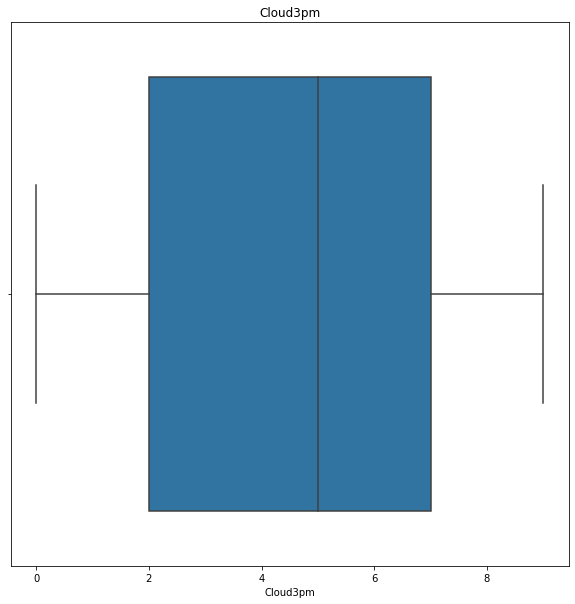

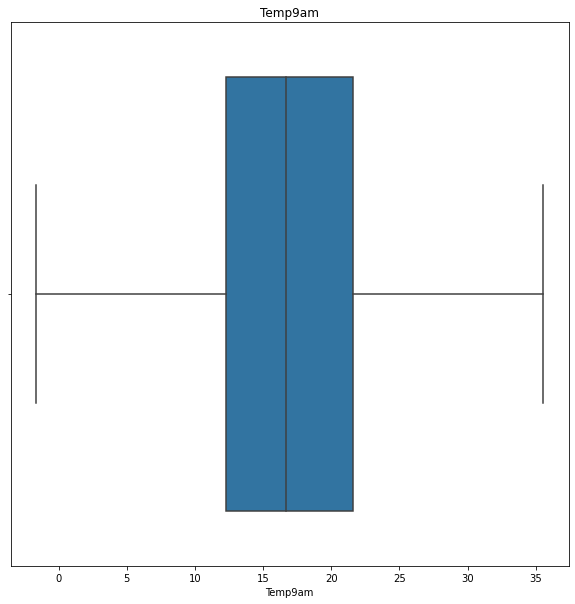

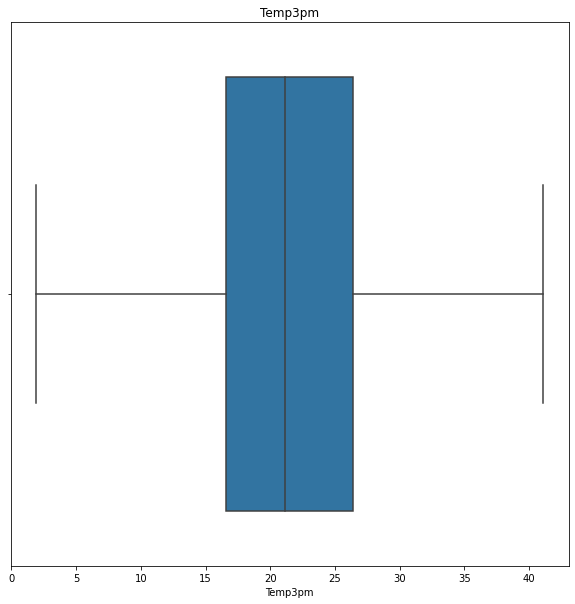

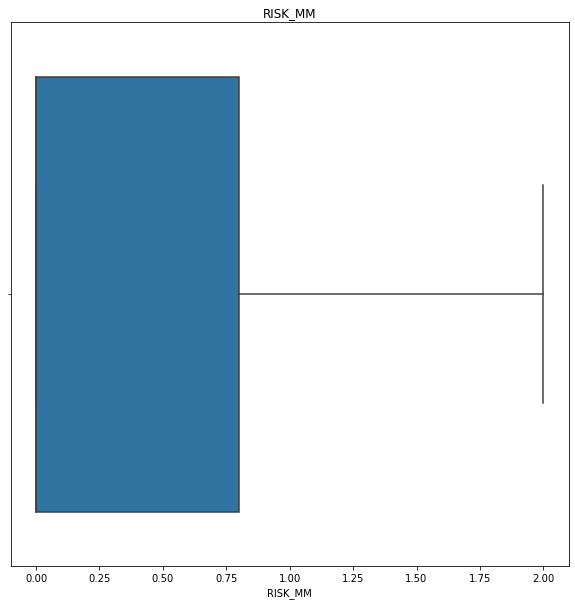

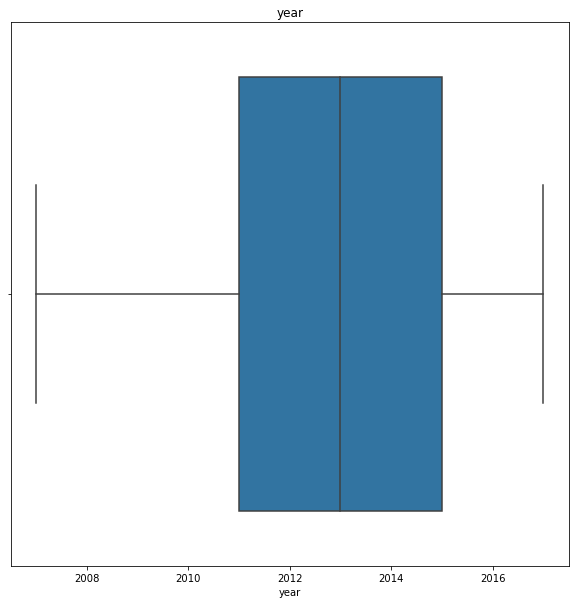

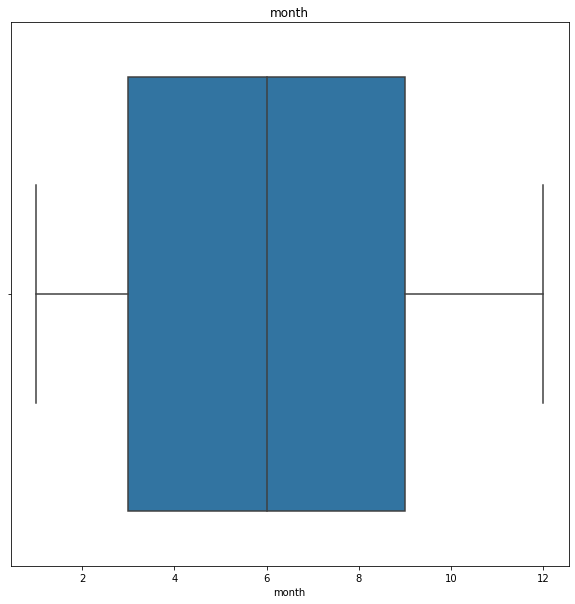

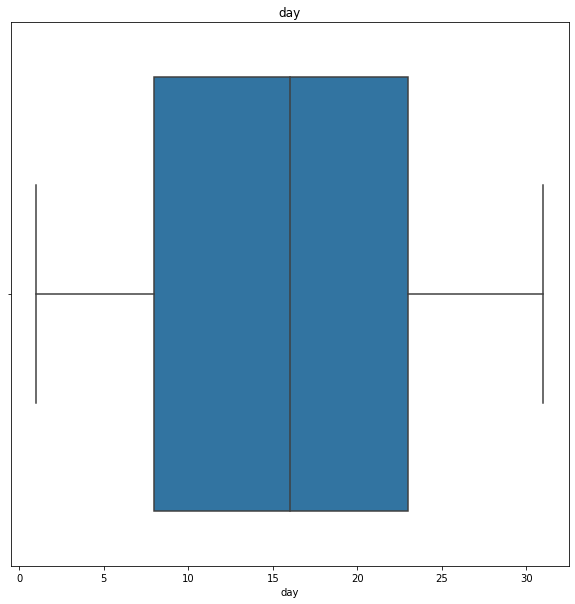

In [30]:
for caracteristica in caracteristicas_numericas:
 plt.figure(figsize=(10,10))
 sns.boxplot(data_frame[caracteristica])
 plt.title(caracteristica)

In [31]:
## Lista de Caracteristicas Categoricas que tienen valores NULOS.

caracteristicas_numericas_con_nulos = [caracteristica for caracteristica in caracteristicas_numericas if data_frame[caracteristica].isnull().sum()]
caracteristicas_numericas_con_nulos

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [32]:
## Relleno de valores nulos con el valor promedio

for cada_caracteristica in caracteristicas_numericas_con_nulos:
    mean_val = data_frame[cada_caracteristica].mean()
    data_frame[cada_caracteristica].fillna(mean_val,inplace=True)

In [33]:
data_frame.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [34]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.321137,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.321137,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.321137,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.321137,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.321137,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No,2008,12,5


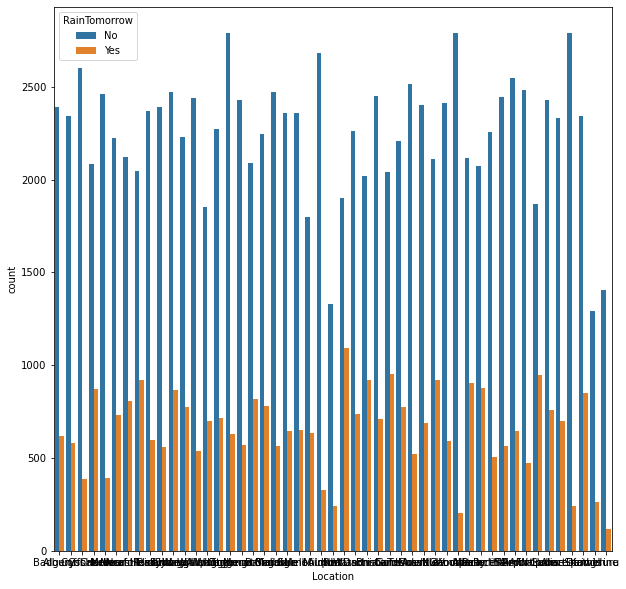

In [35]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=data_frame)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RISK_MM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

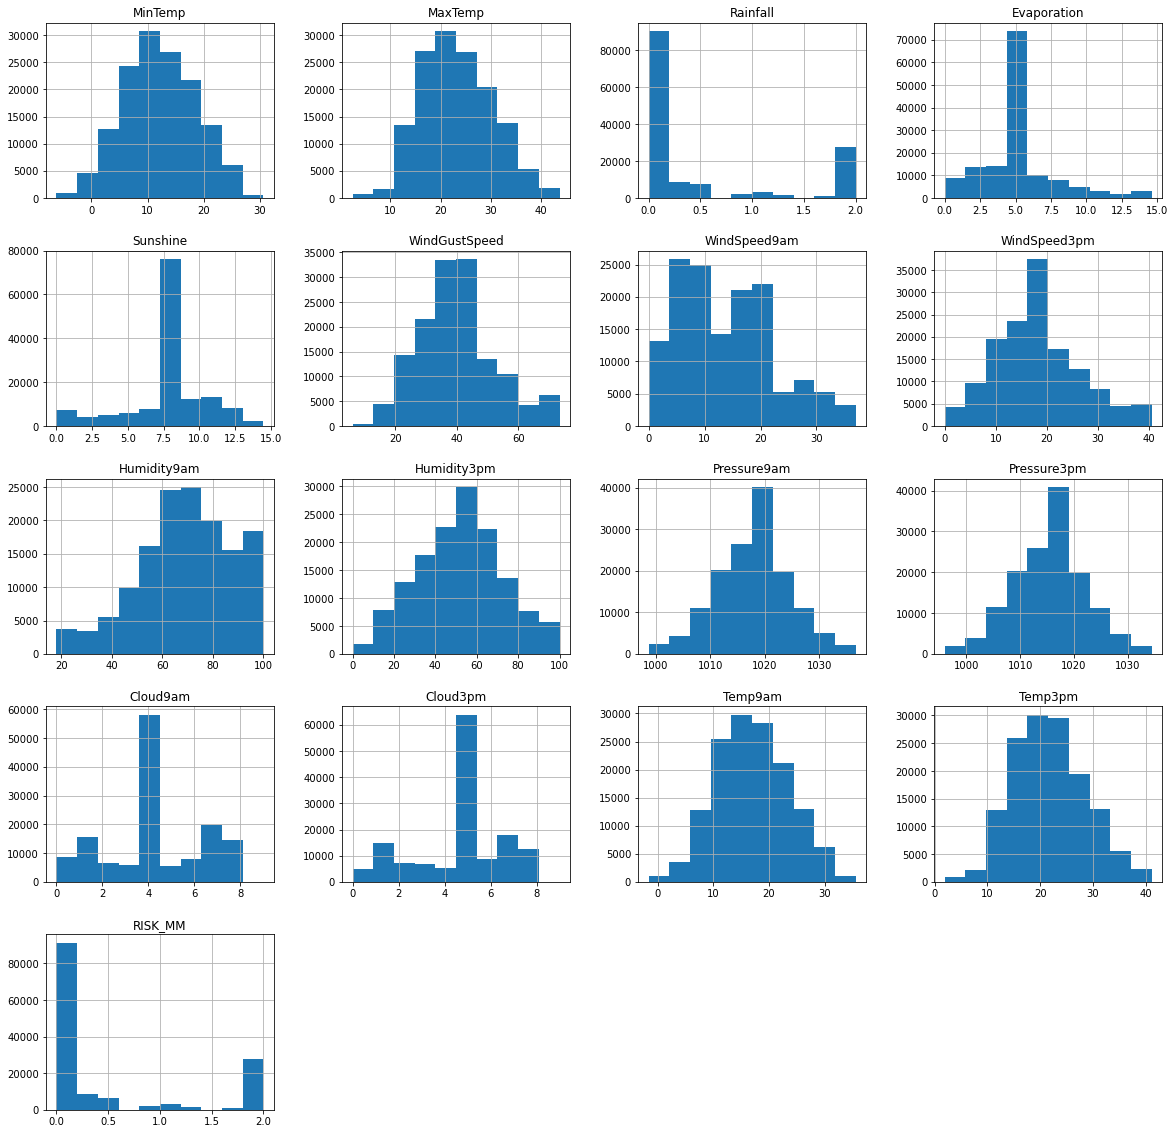

In [36]:
caracteristicas_numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
data_frame[caracteristicas_numericas].hist(bins=10,figsize=(20,20))

In [37]:
data_frame.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,year,month,day
MinTemp,1.000000,0.733904,0.051576,0.407327,0.051904,0.181199,0.179001,0.178314,-0.232122,0.005960,-0.429822,-0.438107,0.061464,0.015904,0.898072,0.699774,0.083314,0.039137,-0.203843,0.001496
MaxTemp,0.733904,1.000000,-0.256889,0.505265,0.332209,0.073760,0.017461,0.053749,-0.498937,-0.499478,-0.315753,-0.402987,-0.227218,-0.214901,0.880257,0.969844,-0.182894,0.058318,-0.164514,-0.000459
Rainfall,0.051576,-0.256889,1.000000,-0.190328,-0.264463,0.152200,0.102232,0.079996,0.388395,0.407840,-0.180612,-0.095774,0.271590,0.235202,-0.114274,-0.261124,0.364833,-0.014851,0.011886,0.003310
Evaporation,0.407327,0.505265,-0.190328,1.000000,0.341201,0.171070,0.157940,0.113318,-0.425116,-0.322005,-0.249312,-0.271082,-0.170573,-0.169173,0.480952,0.489357,-0.117696,0.060172,-0.024539,-0.006505
Sunshine,0.051904,0.332209,-0.264463,0.341201,1.000000,-0.018256,0.008666,0.042939,-0.352476,-0.446849,0.029310,-0.017332,-0.537714,-0.559379,0.210299,0.350266,-0.358352,0.008079,0.017322,-0.000848
WindGustSpeed,0.181199,0.073760,0.152200,0.171070,-0.018256,1.000000,0.579150,0.660493,-0.215608,-0.029331,-0.424842,-0.382334,0.050813,0.078488,0.154971,0.039919,0.234464,-0.031185,0.058393,-0.009864
WindSpeed9am,0.179001,0.017461,0.102232,0.157940,0.008666,0.579150,1.000000,0.508507,-0.274166,-0.033276,-0.214205,-0.164554,0.017606,0.039049,0.132855,0.007777,0.091369,-0.020981,0.051335,-0.009292
WindSpeed3pm,0.178314,0.053749,0.079996,0.113318,0.042939,0.660493,0.508507,1.000000,-0.147419,0.014623,-0.276243,-0.237891,0.040805,0.018127,0.166907,0.032122,0.089642,-0.032741,0.059649,-0.010375
Humidity9am,-0.232122,-0.498937,0.388395,-0.425116,-0.352476,-0.215608,-0.274166,-0.147419,1.000000,0.659634,0.133287,0.177485,0.354967,0.275090,-0.470027,-0.491326,0.287927,0.010647,-0.089153,0.015606
Humidity3pm,0.005960,-0.499478,0.407840,-0.322005,-0.446849,-0.029331,-0.033276,0.014623,0.659634,1.000000,-0.024249,0.050290,0.400006,0.407898,-0.217206,-0.555382,0.479112,-0.008990,-0.018315,0.013040


<AxesSubplot:>

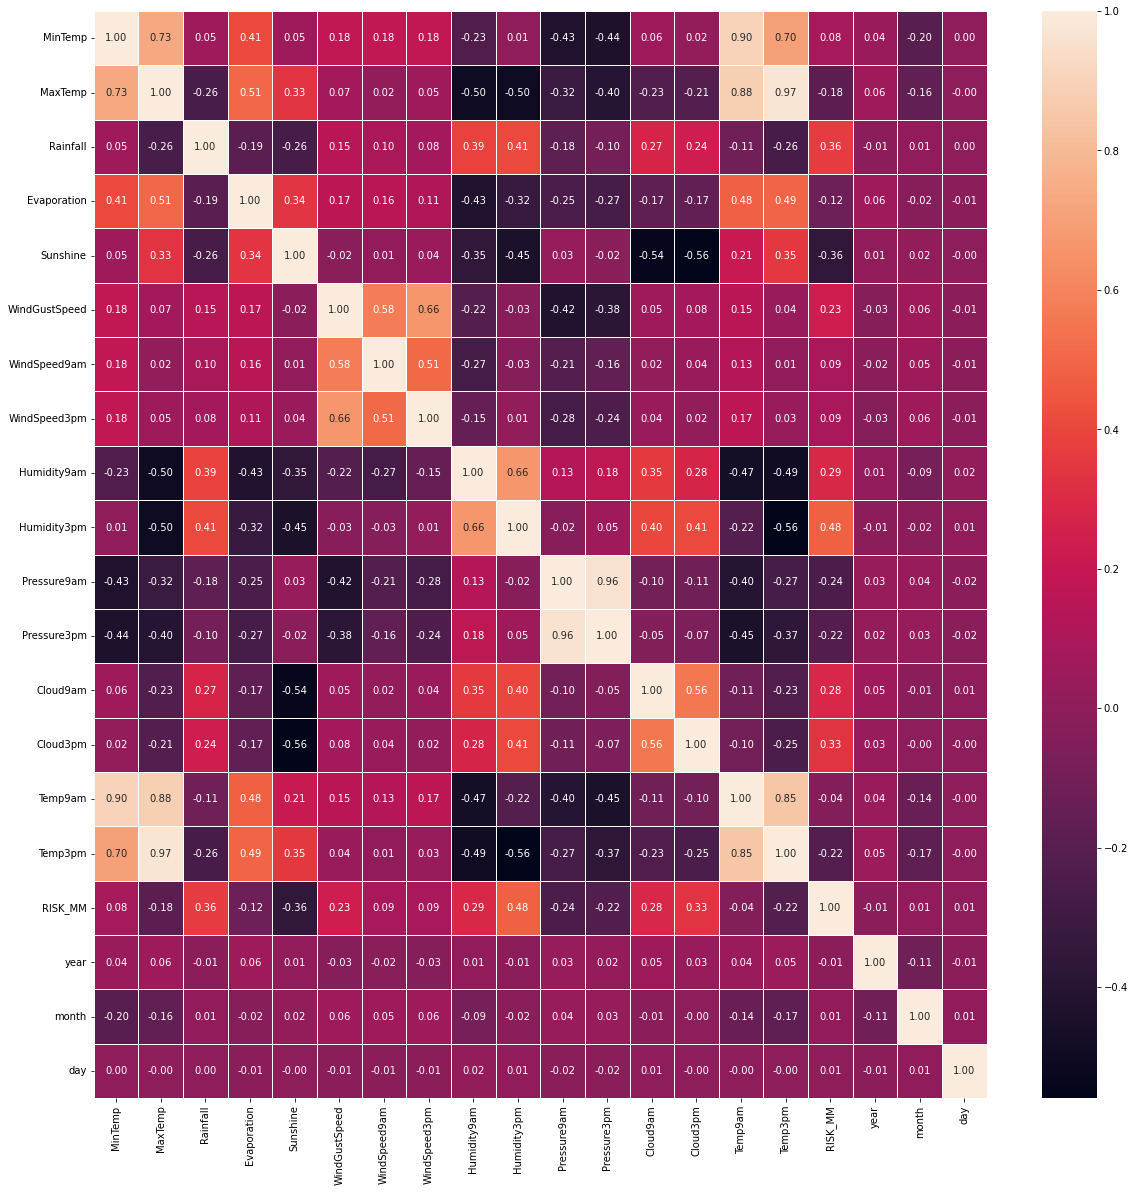

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data_frame.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [39]:
caracteristicas_categoricas

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [40]:
## Codificación de Caracteristicas Categóricas 

data_frame['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

data_frame['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [41]:
def encode_data(feature_name):

 
#Esta función toma el nombre de la función como parámetro y devuelve el diccionario de mapeo
#para reemplazar (o mapear) datos categóricos con datos numéricos.


    mapping_dict = {}

    unique_values = list(data_frame[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict


In [42]:
data_frame['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

In [43]:
data_frame['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

In [44]:
data_frame['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

In [45]:
data_frame['Location'].replace(encode_data('Location'), inplace = True)

In [46]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.321137,7.624853,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0,2008,12,1
1,0,7.4,25.1,0.0,5.321137,7.624853,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0,2008,12,2
2,0,12.9,25.7,0.0,5.321137,7.624853,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0,2008,12,3
3,0,9.2,28.0,0.0,5.321137,7.624853,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0,2008,12,4
4,0,17.5,32.3,1.0,5.321137,7.624853,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0,2008,12,5


In [47]:
X = data_frame.drop(['RainTomorrow', 'RISK_MM'],axis=1)
y = data_frame['RainTomorrow']

In [48]:
## Buscando caracteristicas de importancia usando ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [49]:
etr_model.feature_importances_

array([0.03437977, 0.02960013, 0.02840798, 0.0499757 , 0.02286685,
       0.04436053, 0.02957581, 0.05694673, 0.03024262, 0.03116112,
       0.03053115, 0.03169119, 0.03616217, 0.20921593, 0.03532729,
       0.05146006, 0.02355482, 0.03375378, 0.02784842, 0.02812469,
       0.04255797, 0.03020851, 0.03022868, 0.03181812])

<AxesSubplot:>

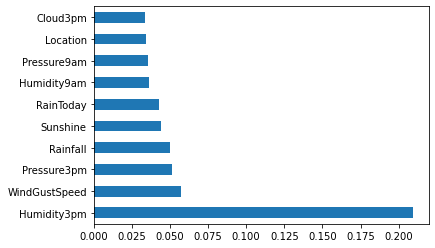

In [50]:
caracteristica_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
caracteristica_imp.nlargest(10).plot(kind='barh')

In [51]:
caracteristica_imp

Location         0.034380
MinTemp          0.029600
MaxTemp          0.028408
Rainfall         0.049976
Evaporation      0.022867
Sunshine         0.044361
WindGustDir      0.029576
WindGustSpeed    0.056947
WindDir9am       0.030243
WindDir3pm       0.031161
WindSpeed9am     0.030531
WindSpeed3pm     0.031691
Humidity9am      0.036162
Humidity3pm      0.209216
Pressure9am      0.035327
Pressure3pm      0.051460
Cloud9am         0.023555
Cloud3pm         0.033754
Temp9am          0.027848
Temp3pm          0.028125
RainToday        0.042558
year             0.030209
month            0.030229
day              0.031818
dtype: float64

In [52]:
## División de Datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [53]:
print("Largo de Training Data: {}".format(len(X_train)))
print("Largo de Testing Data: {}".format(len(X_test)))

Largo de Training Data: 113754
Largo de Testing Data: 28439


In [54]:
## Escalado de Caracteristicas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

In [56]:
## Construyendo Modelo regresión lineal ##

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [60]:
print("Tiempo de Entrenamiento: {}".format(end_time - start_time))

Tiempo de Entrenamiento: 1.0952489376068115


In [61]:
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [62]:
## Evaluacion del rendimiento del modelo
from sklearn.metrics import accuracy_score
print("Puntuación de Precisión: {}".format(accuracy_score(y_test,y_pred)))

Puntuación de Precisión: 0.8454235380990893


In [63]:
## Comprovación de Subajuste y Sobreajuste
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8422385146895933
Test Data Score: 0.8454235380990893


[[20837  1230]
 [ 3166  3206]]


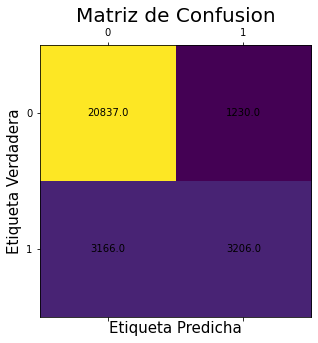

In [64]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusion', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i , j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [65]:
## Reporte de Clasificación

print("\n",classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       0.87      0.94      0.90     22067
           1       0.72      0.50      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



In [66]:
# Prediciendo probabilidades 
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [67]:
# Estableciendo Tasa de Verdaderos Positivos(tpr), Tasa de Falsos Positivos(fpr) 
## y el umbral de valores para trazar la curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

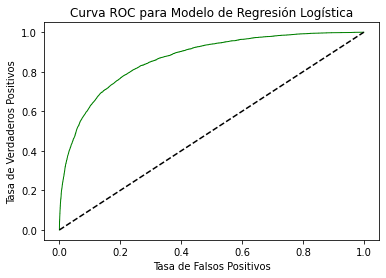

In [68]:
# Grafico de Curva ROC
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('Curva ROC para Modelo de Regresión Logística')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7236996963336931


In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Puntuaciones de validación cruzada:{}'.format(scores))
print('Puntaje promedio de validación cruzada: {}'.format(scores.mean()))

Puntuaciones de validación cruzada:[0.84325964 0.84035867 0.84005099 0.84536943 0.84232967]
Puntaje promedio de validación cruzada: 0.8422736787804521


In [71]:
## MODELO DE REGRESIÓN LINEAL MÚLTIPLE ##

In [72]:
data_frame1 = data_frame[['Location','Temp9am', 'WindSpeed9am', 'Humidity9am', 'MaxTemp']]
data_frame1 = data_frame1[data_frame1['Location']== 0]
data_frame1

,Location,Temp9am,WindSpeed9am,Humidity9am,MaxTemp
0,0,16.9,20.0,71.0,22.9
1,0,17.2,4.0,44.0,25.1
2,0,21.0,19.0,38.0,25.7
3,0,18.1,11.0,45.0,28.0
4,0,17.8,7.0,82.0,32.3
...,...,...,...,...,...
3006,0,2.9,0.0,100.0,15.2
3007,0,3.6,6.0,100.0,13.4
3008,0,2.7,9.0,100.0,11.9
3009,0,3.9,4.0,100.0,14.1


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Se separan las variables predictoras y la predecida
x = data_frame1[['Temp9am','WindSpeed9am','Humidity9am']] # Variables independientes
y = data_frame1['MaxTemp'] # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=29)
# Tipo de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.88
MSE: 6.88
Score del modelo : 0.89


In [74]:
print(modelo.predict([[16.9, 20, 71]]))

[22.69209243]


In [75]:
# Normalizando el modelo
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_selected = data_frame1[['Temp9am','WindSpeed9am', 'Humidity9am']]
scaled_data = sc.fit_transform(data_selected)
pd.DataFrame(scaled_data).head()

,0,1,2
0,0.400070,1.745836,-0.177980
1,0.447176,-0.627307,-1.727545
2,1.043857,1.597514,-2.071893
3,0.588495,0.410943,-1.670153
4,0.541389,-0.182343,0.453325


In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y,
test_size=0.2,random_state=29)
# Tipo de modelo
modelo_x = LinearRegression()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo_x.score(X_train, y_train))

R2 :0.88
MSE: 6.88
Score del modelo : 0.89


In [77]:
# Modelo normalizado
print(modelo.predict([[16.9, 20, 71]]))

[22.69209243]


In [78]:
## Modelo de Árbol de decisión de regresión

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X = data_frame[['Temp9am','WindSpeed9am', 'Humidity9am' ]]
y = data_frame.MaxTemp
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
Y_pred = modelo.predict(X_test)
# Evaluación del modelo
print('Precisión del modelo (en entrenamiento):', modelo.score(X_train,y_train))
print('Precisión del modelo (en validación):', modelo.score(X_test, y_test))

Precisión del modelo (en entrenamiento): 0.7953146435934844
Precisión del modelo (en validación): 0.7947278041930734


Profundidad del árbol: 5
Número de nodos terminales: 32


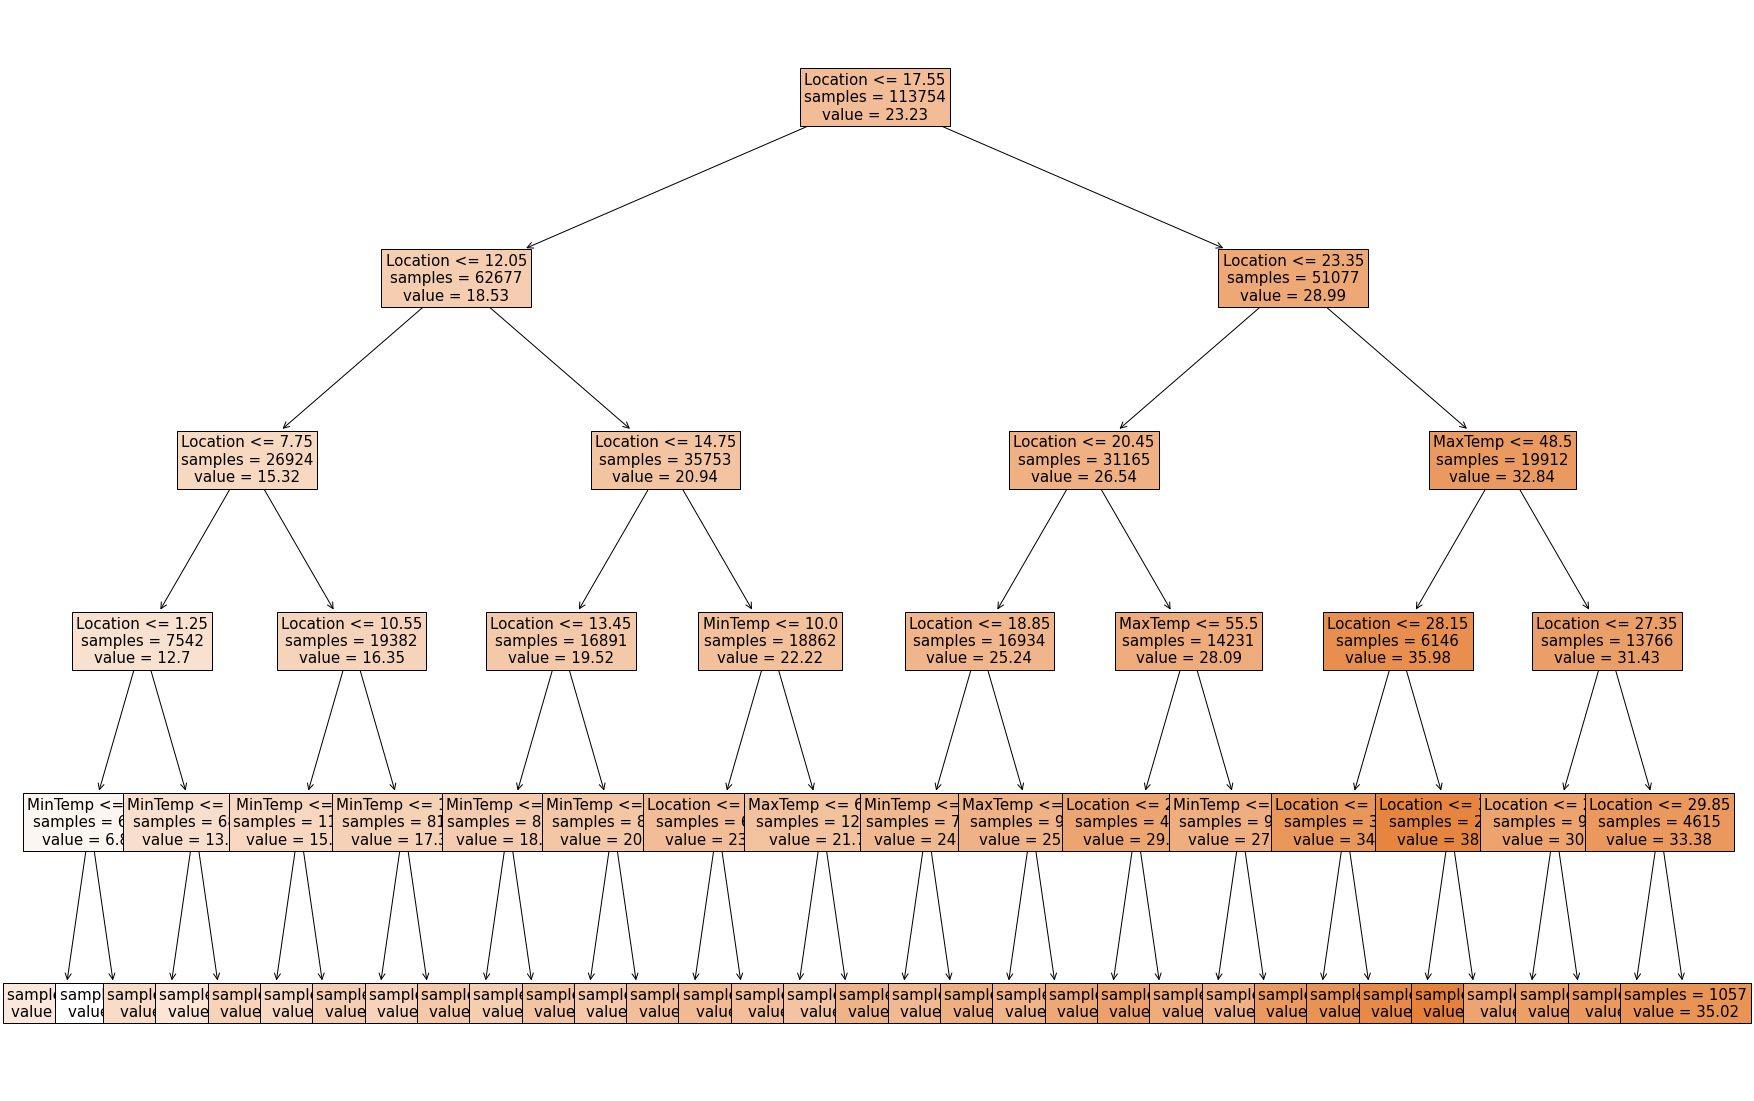

In [80]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 20))
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")
plot = plot_tree(
decision_tree = modelo,
feature_names = data_frame.drop(columns = []).columns,
class_names = 'MaxTemp',
filled = True,
impurity = False,
fontsize = 15,
precision = 2,
ax = ax
)


In [81]:
#Empieza modelo K-Means
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# Se separan las variables predictoras y la predecida
X = data_frame[['Temp9am','WindSpeed9am','Humidity9am']] # Variables independientes
y = data_frame['MaxTemp'] # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=29)
# Tipo de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.80
MSE: 9.84
Score del modelo : 0.80


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [84]:
# Vemos cuanto es la temperatura maxima (Max temp)
data_frame.groupby('MaxTemp').size()

MaxTemp
2.45     294
2.50      13
2.60      11
2.70      12
2.80       4
        ... 
43.30     16
43.40     21
43.50     20
43.60     15
43.65    165
Length: 415, dtype: int64

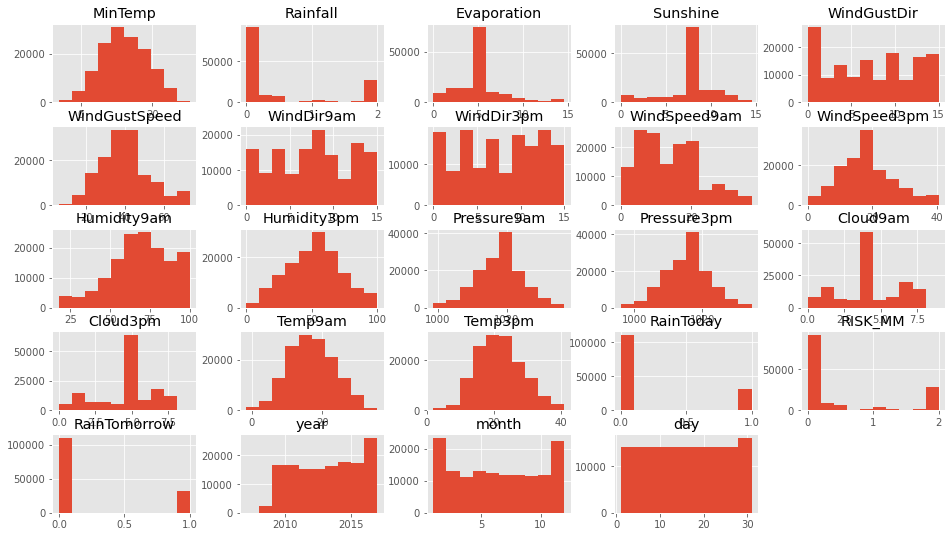

In [85]:
data_frame.drop(['MaxTemp','Location'],1).hist()
plt.show()

In [86]:
# Pasamos de variable categórica Maxima Temperatura (MaxTemp)
total = data_frame['MaxTemp'].unique().size
d_categoria = dict(zip(data_frame['MaxTemp'].unique(),range(1,total+1)))
data_frame['categoria'] = data_frame['MaxTemp'].map(d_categoria)
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day,categoria
0,0,13.4,22.9,0.6,5.321137,7.624853,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0,2008,12,1,1
1,0,7.4,25.1,0.0,5.321137,7.624853,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0,2008,12,2,2
2,0,12.9,25.7,0.0,5.321137,7.624853,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0,2008,12,3,3
3,0,9.2,28.0,0.0,5.321137,7.624853,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0,2008,12,4,4
4,0,17.5,32.3,1.0,5.321137,7.624853,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0,2008,12,5,5


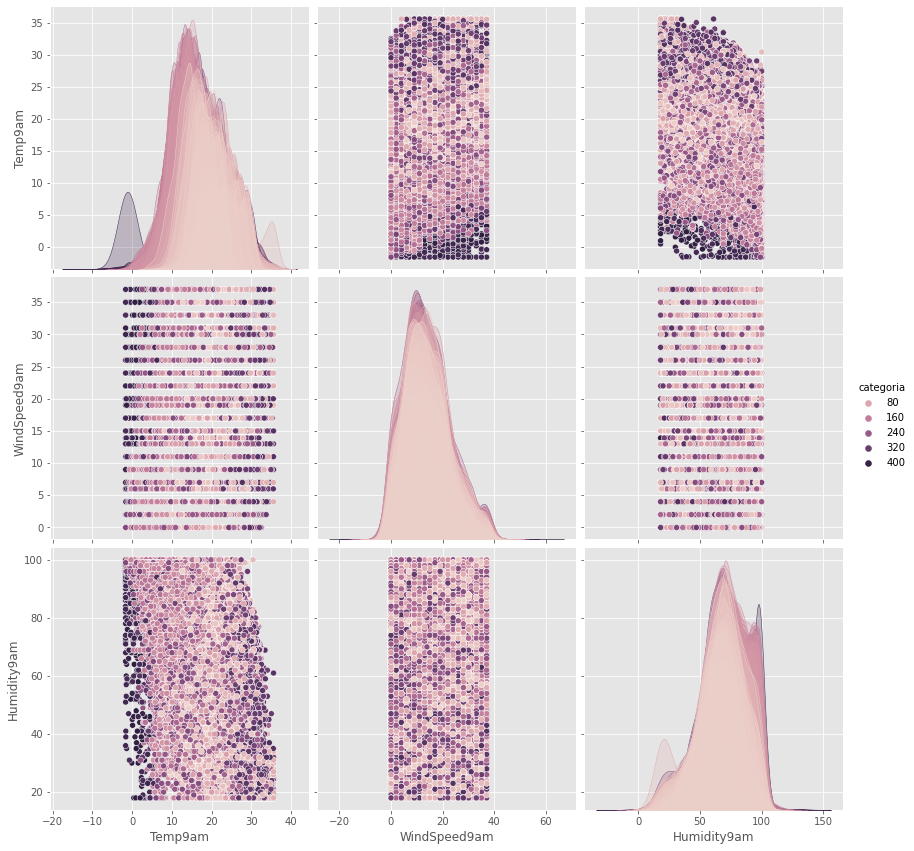

In [87]:
sb.pairplot(data_frame.dropna(), hue='categoria',height=4,vars=["Temp9am","WindSpeed9am","Humidity9am"],kind='scatter')

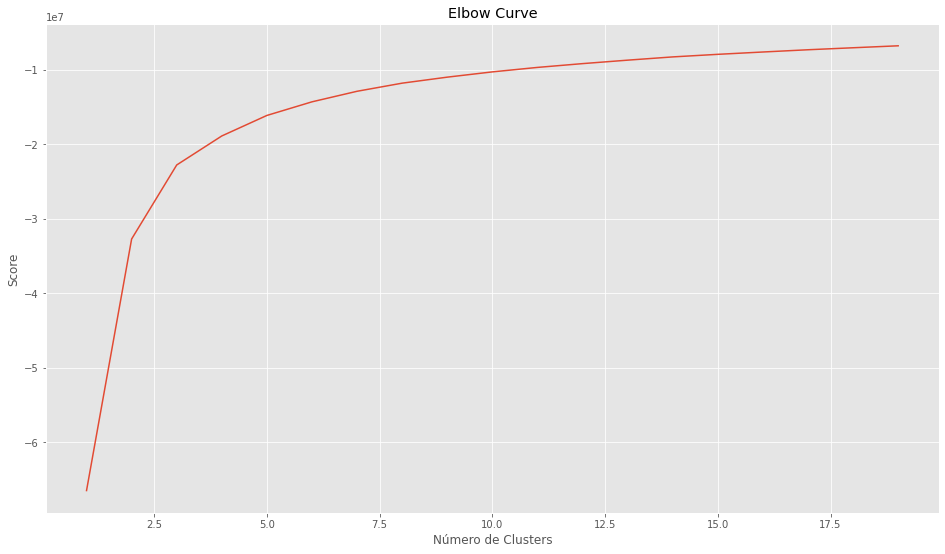

In [88]:
from sklearn.cluster import KMeans
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(num_clusters,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [89]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[12.22068312  9.21086729 91.78574996]
 [18.80463827 16.72006493 54.4730975 ]
 [16.30303323 23.60022313 75.45112088]
 [17.78585831  8.60220181 71.07419392]
 [23.25634695 18.20354366 31.52741514]]


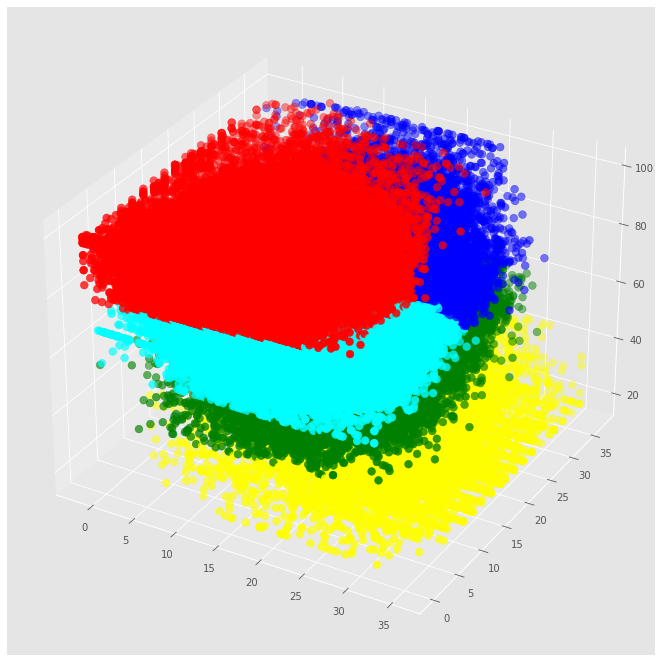

In [90]:
X = np.array(data_frame[["Temp9am","WindSpeed9am","Humidity9am"]])
y = np.array(data_frame['categoria'])
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
# 5 colores porque k = 5
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [91]:
copy = pd.DataFrame()
copy['Location']=data_frame['Location'].values
copy['categoria']=data_frame['categoria'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,33981
1,green,35741
2,blue,21283
3,cyan,38127
4,yellow,13061


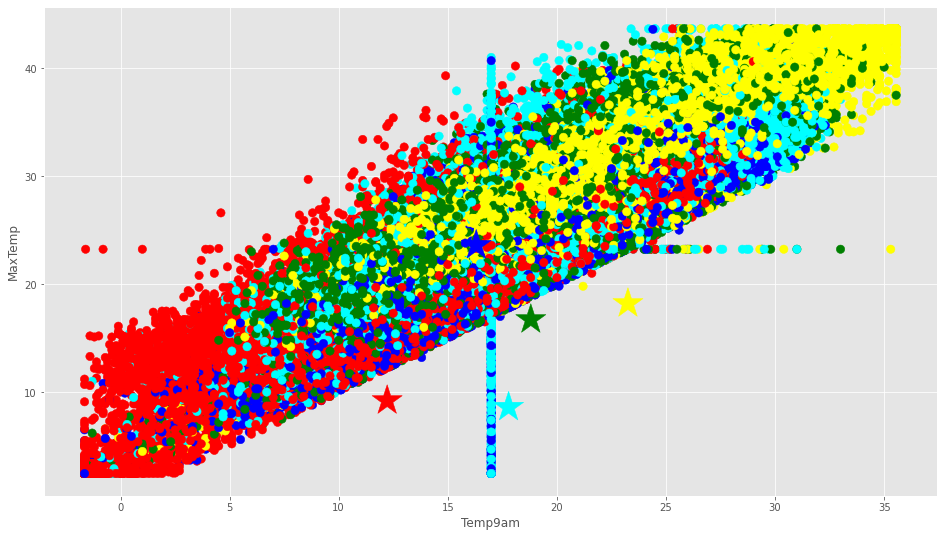

In [92]:
# Getting the values and plotting it
f1 = data_frame['Temp9am'].values
f2 = data_frame['MaxTemp'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Temp9am")
plt.ylabel("MaxTemp")
plt.show()

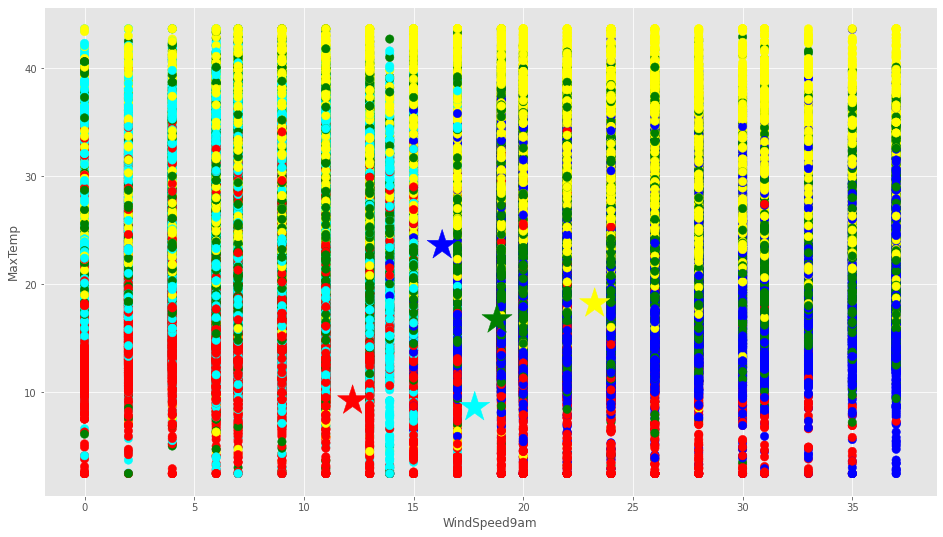

In [93]:
# Getting the values and plotting it
f1 = data_frame['WindSpeed9am'].values
f2 = data_frame['MaxTemp'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("WindSpeed9am")
plt.ylabel("MaxTemp")
plt.show()

In [94]:
# Se busca el representante del grupo, el usuario cercano a su centroid
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 58949, 120326, 132745,  15783,  90568], dtype=int64)